# **logistic regression**

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/train_and_test2.csv")

In [ ]:
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


<Axes: >

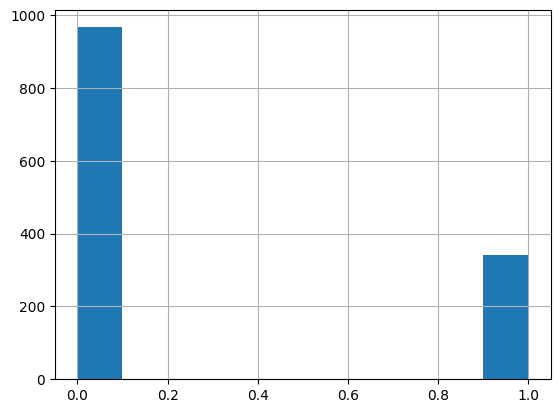

In [ ]:
data["2urvived"].hist()

In [ ]:
data_incomplete_rows=data[data.isnull().any(axis=1)]
data_incomplete_rows

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
61,62,38.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1
829,830,62.0,80.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,NaN,0,0,1


In [ ]:
# Drop rows with any NaN values
data_cleaned = data.dropna()

# Display the cleaned data
data_cleaned


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
data_incomplete_rows=data_cleaned[data_cleaned.isnull().any(axis=1)]
data_incomplete_rows

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived


In [ ]:
y=data_cleaned["2urvived"]
y

,2urvived
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,0
1306,0
1307,0


In [ ]:
X=data_cleaned.iloc[:,:-1]
X

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,0
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(0.2),random_state=42)
X_train

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
1294,1295,17.0,47.1000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0
544,545,50.0,106.4250,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0,0
290,291,26.0,78.8500,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0
10,11,4.0,16.7000,1,1,0,0,0,0,0,...,0,0,0,0,3,0,0,2.0,0,0
148,149,36.5,26.0000,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1098,35.0,7.7500,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,1.0,0,0
1132,1133,45.0,30.0000,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2.0,0,0
1296,1297,20.0,13.8625,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0.0,0,0
862,863,48.0,25.9292,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2.0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_trained=scaler.fit_transform(X_train)
scaled_X_trained

array([[ 1.68459157, -0.99427003,  0.23102728, ...,  0.61860675,
         0.        ,  0.        ],
       [-0.29237989,  1.59937977,  1.32634796, ..., -1.84403727,
         0.        ,  0.        ],
       [-0.96191423, -0.28691099,  0.81722925, ...,  0.61860675,
         0.        ,  0.        ],
       ...,
       [ 1.6898635 , -0.75848368, -0.38263847, ..., -1.84403727,
         0.        ,  0.        ],
       [ 0.54585601,  1.44218888, -0.15985034, ...,  0.61860675,
         0.        ,  0.        ],
       [ 1.24702189, -0.75848368, -0.50518699, ..., -1.84403727,
         0.        ,  0.        ]])

In [ ]:
scaled_X_test=scaler.transform(X_test)
scaled_X_test

array([[ 1.34718844, -0.75848368, -0.15854315, ...,  0.61860675,
         0.        ,  0.        ],
       [ 1.03878089,  0.97061618, -0.14838847, ...,  0.61860675,
         0.        ,  0.        ],
       [ 0.3666106 , -0.36550644, -0.49280198, ...,  0.61860675,
         0.        ,  0.        ],
       ...,
       [ 0.61702698, -0.28691099, -0.08469094, ..., -1.84403727,
         0.        ,  0.        ],
       [-0.9012871 , -0.1297201 , -0.49280198, ...,  0.61860675,
         0.        ,  0.        ],
       [-1.1991508 , -0.1297201 , -0.46318355, ...,  0.61860675,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(scaled_X_trained,y_train)

LogisticRegression()

In [ ]:
y_predicted=model.predict(scaled_X_test)
y_predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

def algo_accuracy(y_test,prediction):

    cm=confusion_matrix(y_test,prediction)
    acs= accuracy_score(y_test,prediction)
    ps=precision_score(y_test,prediction)
    rs=recall_score(y_test,prediction)
    fs=f1_score(y_test,prediction)
    return cm,acs,ps,rs,fs

In [ ]:
cm,acs,ps,rs,f1=algo_accuracy(y_test,y_predicted)

confusion matrix  [[182  10]
 [ 34  36]]
accuracy score  0.8320610687022901
precision score  0.782608695652174
recall score  0.5142857142857142
f1 score  0.6206896551724138


<Figure size 800x600 with 0 Axes>

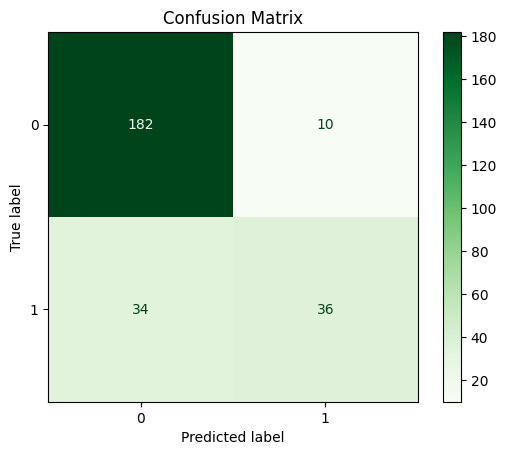

In [ ]:
print("confusion matrix ",cm)
print("accuracy score ",acs)
print("precision score ",ps)
print("recall score ",rs)
print("f1 score ",f1)
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(8, 6))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens')

# Add a title to the plot
plt.title('Confusion Matrix')

# Show the plot
plt.show()


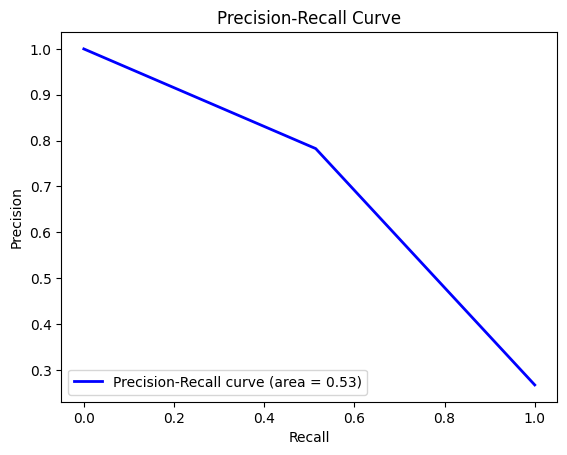

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_predicted)
average_precision = average_precision_score(y_test, y_predicted)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree_run(depth):
    tree_clf=DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(scaled_X_trained,y_train)
    return tree_clf.score(scaled_X_test,y_test)
decision_tree_run(None)

0.8282442748091603

In [ ]:
accuracy=[]
tree_depth=list(range(2,100,3))

In [ ]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.8702290076335878,
 0.8778625954198473,
 0.8549618320610687,
 0.8473282442748091,
 0.8473282442748091,
 0.8320610687022901,
 0.8320610687022901,
 0.8282442748091603,
 0.8358778625954199,
 0.8129770992366412,
 0.8206106870229007,
 0.8206106870229007,
 0.816793893129771,
 0.8358778625954199,
 0.8206106870229007,
 0.8206106870229007,
 0.8282442748091603,
 0.8206106870229007,
 0.7977099236641222,
 0.8358778625954199,
 0.8358778625954199,
 0.816793893129771,
 0.8435114503816794,
 0.8091603053435115,
 0.8091603053435115,
 0.8282442748091603,
 0.8206106870229007,
 0.8435114503816794,
 0.8358778625954199,
 0.8129770992366412,
 0.8244274809160306,
 0.8244274809160306,
 0.8358778625954199]

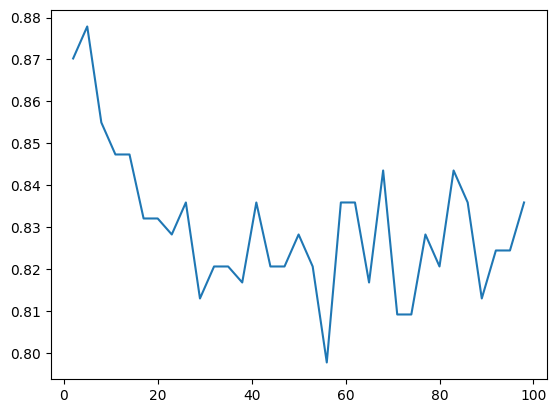

In [ ]:
plt.plot(tree_depth,accuracy)

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(scaled_X_trained,y_train)
tree_clf.score(scaled_X_test,y_test)

0.8702290076335878